<a href="https://colab.research.google.com/github/bigflyy/DeepLearningWithPython/blob/main/2LinearClassifierTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Tensors

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [ ]:
e *= d

In [ ]:
e[0,0] = 4

This proves it is immutable tho operations on tensors do work so they can change

## Gradient Tape

In [3]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

Interesting that it has absolutely no variables, just numbers, and it computes it nonetheless...

## Linear classifier with pure tensorflow


In [51]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
mean=[0, 3],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
mean=[3, 0],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)
display(negative_samples,positive_samples)

array([[-0.02277946,  2.8575269 ],
       [-0.96220627,  2.01570249],
       [ 1.17016088,  3.85005326],
       ...,
       [-0.76539463,  3.65514604],
       [ 0.14274388,  3.26771685],
       [-0.69271542,  2.06288266]])

array([[ 3.76742544, -0.15643704],
       [ 1.80969285, -1.70857595],
       [ 3.98121114,  0.22073637],
       ...,
       [ 3.96608484,  0.69414992],
       [ 1.77491752, -1.74985756],
       [ 1.30786819, -1.71550153]])

In [63]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-0.02277946,  2.8575268 ],
       [-0.96220624,  2.0157025 ],
       [ 1.1701609 ,  3.8500533 ],
       ...,
       [ 3.966085  ,  0.6941499 ],
       [ 1.7749175 , -1.7498575 ],
       [ 1.3078682 , -1.7155015 ]], dtype=float32)

In [64]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"), np.ones((num_samples_per_class,1),dtype="float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

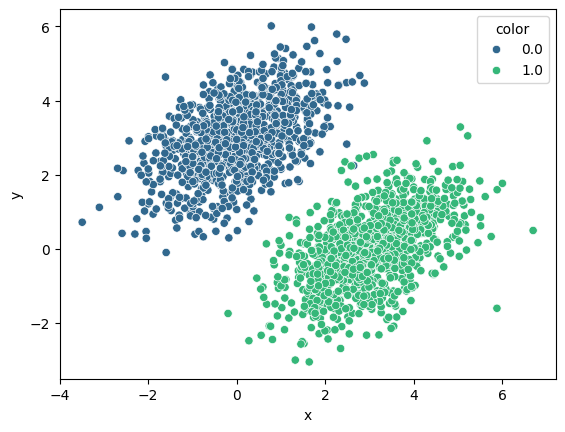

In [54]:
# Convert data to a DataFrame for easier Seaborn handling
df = pd.DataFrame({
    'x': inputs[:, 0],
    'y': inputs[:, 1],
    'color': targets[:, 0]
})

# Create the scatter plot
sns.scatterplot(data=df, x='x', y='y', hue='color', palette='viridis')

# Show the plot
plt.show()

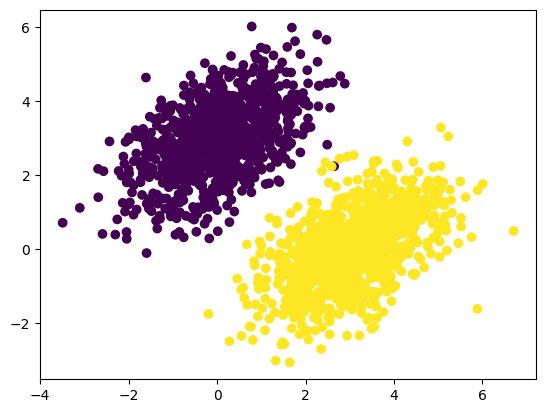

In [55]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [66]:
input_dim=2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim,output_dim))) # beacuse we multiply and if we want two output_dim we d need more...
b = tf.Variable(initial_value=tf.zeros((output_dim,))) # why output_dim. single neuron. yes. the bias of this neuron. Or this layer of neurons ?? no neuron.
#

In [67]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [76]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [77]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [78]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"step : {step}; loss : {loss}\n")

step : 0; loss : 5.888035774230957

step : 1; loss : 0.7349855899810791

step : 2; loss : 0.22549036145210266

step : 3; loss : 0.14923107624053955

step : 4; loss : 0.13070395588874817

step : 5; loss : 0.12049814313650131

step : 6; loss : 0.11205648630857468

step : 7; loss : 0.10445935279130936

step : 8; loss : 0.09753301739692688

step : 9; loss : 0.09120634198188782

step : 10; loss : 0.08542583882808685

step : 11; loss : 0.08014415204524994

step : 12; loss : 0.07531822472810745

step : 13; loss : 0.07090869545936584

step : 14; loss : 0.06687967479228973

step : 15; loss : 0.06319829821586609

step : 16; loss : 0.05983458086848259

step : 17; loss : 0.05676110461354256

step : 18; loss : 0.053952835500240326

step : 19; loss : 0.05138687789440155

step : 20; loss : 0.04904232919216156

step : 21; loss : 0.04690009355545044

step : 22; loss : 0.0449427030980587

step : 23; loss : 0.04315420985221863

step : 24; loss : 0.04152003303170204

step : 25; loss : 0.040026869624853134

In [79]:
predictions = model(inputs)
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 0.03126001],
       [-0.04438341],
       [ 0.13612457],
       ...,
       [ 1.013324  ],
       [ 0.8922322 ],
       [ 0.8024626 ]], dtype=float32)>

In [80]:
np.max(predictions)

1.6320031

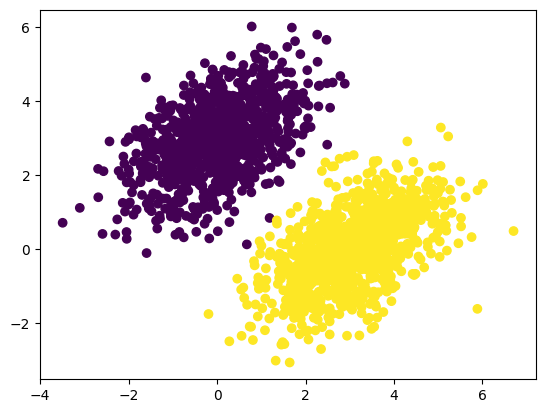

In [84]:
plt.scatter(x=inputs[:, 0], y = inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

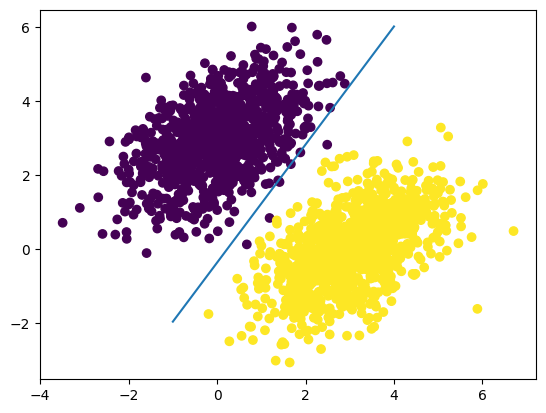

In [87]:
x = np.linspace(-1, 4, 100)
# w0*x1 + w1 * x2 + b = 0
# x2 = -b - w0/w1 * x1
y = -W[0]/W[1] * x -b
plt.plot(x,y)
plt.scatter(x=inputs[:, 0], y = inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()